<a href="https://colab.research.google.com/github/tskmr/PDC/blob/main/QualityControl_Lec9_10_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# 工程能力指数 $C_p$

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


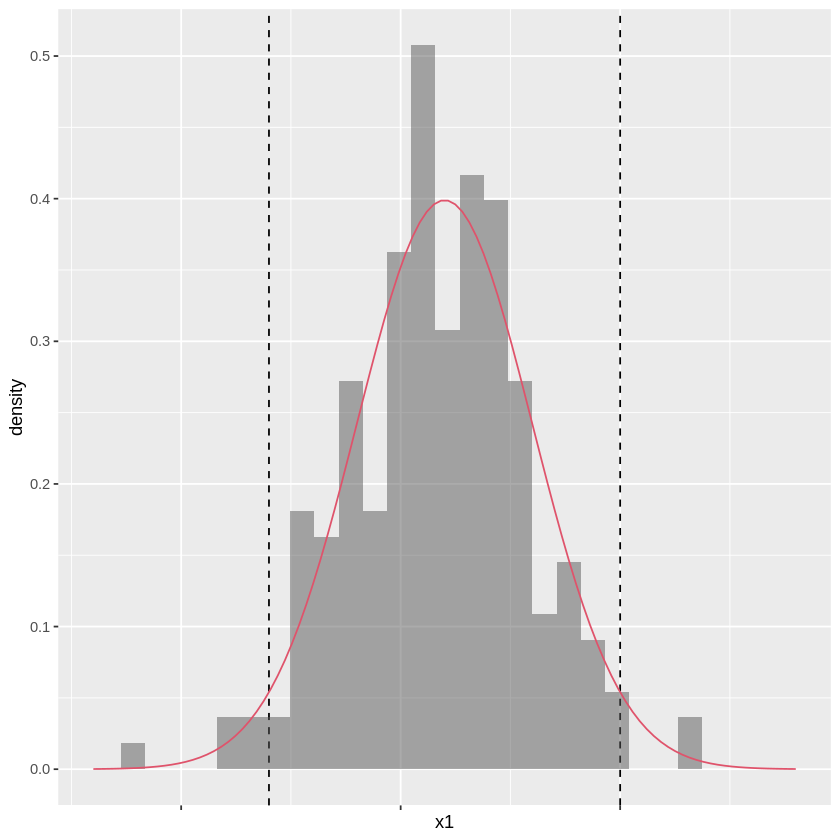

In [ ]:
tu=5
tl=1

mu = 3
sigma = 1
x = seq(-1, 7, len=100)
y = dnorm(x, mu, sigma)
x1 = rnorm(200, mu, sigma)
p= data.frame(x,y,x1) %>% 
  ggplot()+
  geom_vline(xintercept=tu,linetype=2)+
  geom_vline(xintercept=tl,linetype=2)+
  scale_x_continuous(labels=NULL,limits=c(-1,7)); 
p = p + geom_histogram(aes(x1,..density..),alpha=0); 
p = p + geom_histogram(aes(x1,..density..),alpha=.5); 
p = p + geom_line(aes(x,y),col=2);
p

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


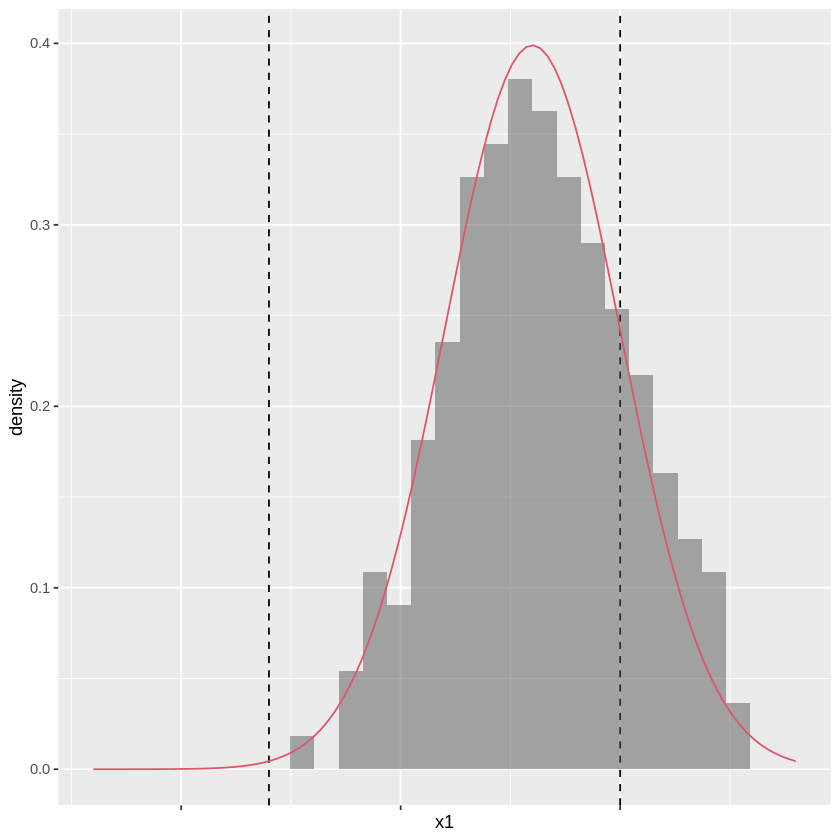

In [ ]:
mu = 4
sigma = 1
x = seq(-1, 7, len=100)
y = dnorm(x, mu, sigma)
x1 = rnorm(200, mu, sigma)
p= data.frame(x,y,x1) %>% 
  ggplot()+
  geom_vline(xintercept=tu,linetype=2)+
  geom_vline(xintercept=tl,linetype=2)+
  scale_x_continuous(labels=NULL,limits=c(-1,7)); 
p = p + geom_histogram(aes(x1,..density..),alpha=0); 
p = p + geom_histogram(aes(x1,..density..),alpha=.5); 
p = p + geom_line(aes(x,y),col=2);
p

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 8 rows containing non-finite values (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 8 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 78 rows containing missing values (`geom_line()`).”


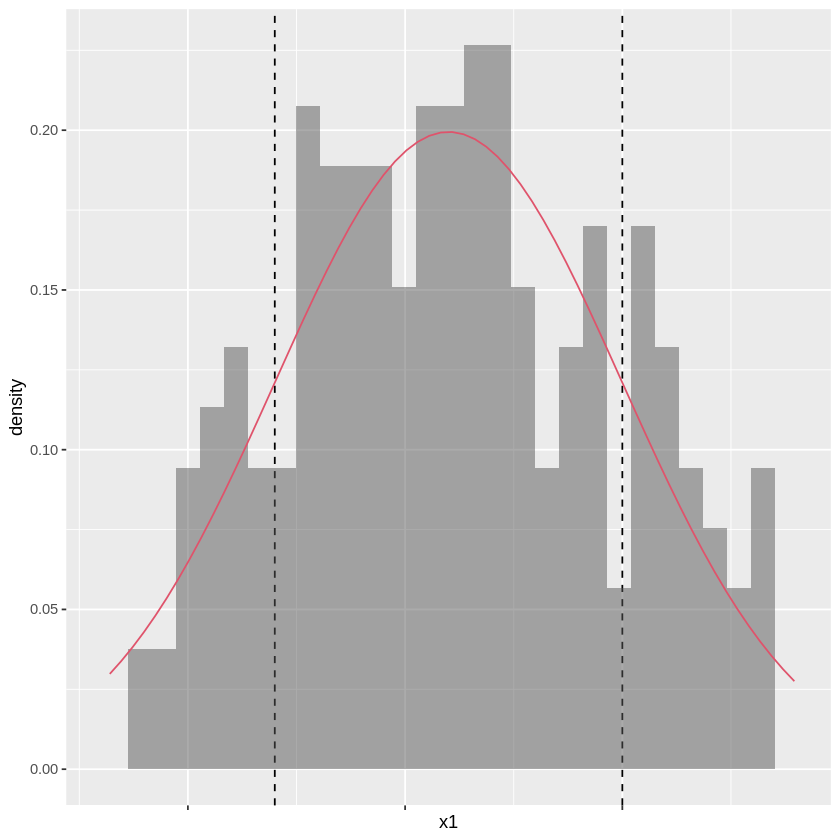

In [ ]:
mu = 3
sigma = 2
x = seq(-3, 10, len=100)
y = dnorm(x, mu, sigma)
x1 = rnorm(200, mu, sigma)
p= data.frame(x,y,x1) %>% 
  ggplot()+
  geom_vline(xintercept=tu,linetype=2)+
  geom_vline(xintercept=tl,linetype=2)+
  scale_x_continuous(labels=NULL,limits=c(-1,7)); 
p = p + geom_histogram(aes(x1,..density..),alpha=0); 
p = p + geom_histogram(aes(x1,..density..),alpha=.5); 
p = p + geom_line(aes(x,y),col=2);
p

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 78 rows containing missing values (`geom_line()`).”


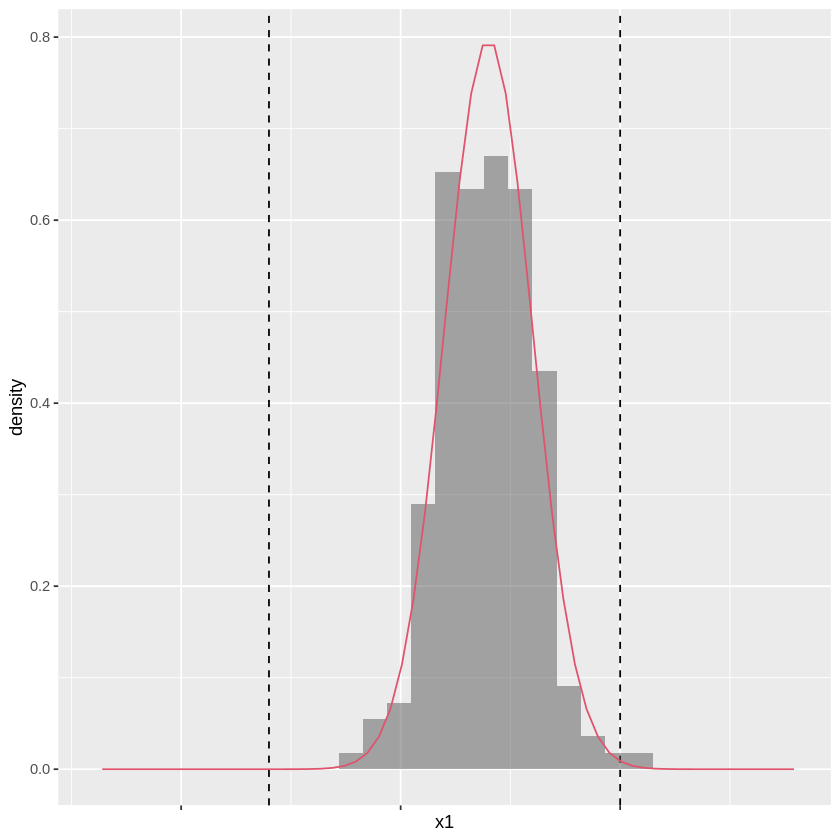

In [ ]:

mu = 3.5
sigma = 0.5
x = seq(-3, 10, len=100)
y = dnorm(x, mu, sigma)
x1 = rnorm(200, mu, sigma)
p= data.frame(x,y,x1) %>% 
  ggplot()+
  geom_vline(xintercept=tu,linetype=2)+
  geom_vline(xintercept=tl,linetype=2)+
  scale_x_continuous(labels=NULL,limits=c(-1,7)); 
p = p + geom_histogram(aes(x1,..density..),alpha=0); 
p = p + geom_histogram(aes(x1,..density..),alpha=.5); 
p = p + geom_line(aes(x,y),col=2);
p

# $\overline X$--$R$管理図

## 管理限界の係数計算

In [ ]:
ns = 2:10
d = data.frame()
for(i in 1:length(ns)){
  n = ns[i]
  
  f = function(x) {1-(1-pnorm(x))^n-(pnorm(x))^n}
  d2 = integrate(f,-Inf,Inf)$value
  
  {integrand = function(x, y) {}}
  body(integrand) = bquote(1-(1-pnorm(x))^n-(pnorm(y))^n+(pnorm(y)-pnorm(x))^n)
  zz = integrate(function(y) {
    sapply(y, function(y) {
      integrate(function(x) {
        sapply(x, function(x) { 
          integrand(x, y) 
        })
      },-Inf, y)$value
    })
  },-Inf, Inf)$value
  d3 = sqrt(2*zz-d2^2)
  
  k=3
  A2=k/(d2*sqrt(n))
  D3=max(0,1-k*d3/d2)
  D4=1+k*d3/d2
  d = rbind(d, data.frame(n,A2,D3,D4,d2,d3))
}

format.sig = function(x,digits=3,format="fg"){
  formatC(signif(x,digits=digits), digits=digits,format=format, flag="#")
}
d$d2 = format.sig(d$d2,4)
d$d3 = format.sig(d$d3,4)
d$A2 = format.sig(d$A2,4)
d$D3 = format.sig(d$D3,4)
d$D4 = format.sig(d$D4,4)
d %>% select(n, d2, d3, A2, D3, D4)

n,d2,d3,A2,D3,D4
<int>,<chr>,<chr>,<chr>,<chr>,<chr>
2,1.128,0.8525,1.880,0,3.267
3,1.693,0.8884,1.023,0,2.575
4,2.059,0.8798,0.7286,0,2.282
5,2.326,0.8641,0.5768,0,2.114
6,2.534,0.8480,0.4832,0,2.004
7,2.704,0.8332,0.4193,0.07571,1.924
8,2.847,0.8198,0.3725,0.1362,1.864
9,2.970,0.8078,0.3367,0.1840,1.816
10,3.078,0.7971,0.3083,0.2230,1.777
